In [30]:
import pandas as pd
df_dir='C:/oxford/annotations/list.txt'
df = pd.read_csv(df_dir, skiprows=6, delimiter=" ", names=["image_name", "class_id", "species", "breed_id"])
df = df[['image_name', 'species']]
categories={0:'cat',1:'dog'}

In [19]:
categories

{'cat': 1, 'dog': 2}

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import xml.etree.ElementTree as ET
IMG_DIR='C:/oxford/images'
ANN_DIR='C:/oxford/annotations/xmls'
images=[]
labels=[]
data=[]
def get_data(IMG_DIR,ANN_DIR):
    count=0
    for i in range(len(df)):
        img=str(df['image_name'][i]+'.jpg')
        class_label=df['species'][i]
        if(class_label==1):
            class_label=0
        else:
            class_label=1
        lines=[]
        try:
            i_dir=os.path.join(IMG_DIR,img)
            ind_lab=[]
            a_dir=os.path.join(ANN_DIR,df['image_name'][i])+'.xml'
            
            img_array=cv2.imread(i_dir)
            img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
            
            if(os.path.exists(a_dir)):
                tree = ET.parse(str(a_dir))
                root = tree.getroot()
                xmin,ymin,xmax,ymax=0,0,0,0
                for neighbor in root.iter('bndbox'):
                    xmin = int(neighbor.find('xmin').text)
                    ymin = int(neighbor.find('ymin').text)
                    xmax = int(neighbor.find('xmax').text)
                    ymax = int(neighbor.find('ymax').text)
                ind_lab=[xmin, ymin, xmax, ymax,class_label]
                labels.append([xmin, ymin, xmax, ymax,class_label])
                images.append(img_array)
                data.append([img_array,ind_lab])
                
            else:
                pass
        except Exception as e:
            print(e)
get_data(IMG_DIR,ANN_DIR)

In [24]:
def resize_img(img,bb):
    resized_img=[]
    resized_bb=[]
    h,w,_=np.array(img).shape
    target_size=(224,224)
    resized_img=cv2.resize(img,target_size)
    scaleX,scaleY=target_size[0]/w,target_size[1]/h
    x,y,width,height,class_label=bb
    new_x=int(np.round(int(x)*float(scaleX)))
    new_y=int(np.round(int(y)*float(scaleY)))
    new_width=int(np.round(int(width)*scaleX))
    new_height=int(np.round(int(height)*scaleY))
    resized_bb.append([new_x,new_y,new_width,new_height,class_label])
    return resized_img,resized_bb

In [25]:
def image_bb_resize(images,labels):
    final_images=[]
    final_labels=[]
    for i in range(len(images)):
        res_img,res_label=resize_img(images[i],labels[i])
        final_images.append(res_img)
        final_labels.append(res_label[0])
    return final_images,final_labels
final_images,final_labels=image_bb_resize(images,labels)

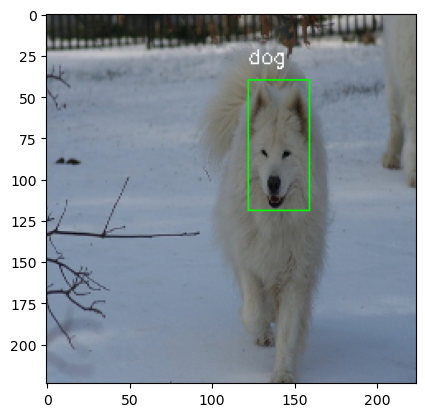

In [31]:
import random

def bb_scale(img,k):
    h,w,_=np.array(img).shape
    x,y,width,height=k
    print(k)
    x,y,width,height=float(x),float(y),float(width),float(height)
    x=int((x-width/2)*w)
    y=int((y-height/2)*h)
    width=int(w*width)
    height=int(h*height)
    return x,y,width,height
def display_img(img,bb):
    color = (0,255,0)
    thickness = 1
    i=0
    count=0
    x,y,width,height,class_label=bb
    x,y,width,height=int(x),int(y),int(width),int(height)
    cv2.rectangle(img,(x,y), (width,height),color, thickness)
    cv2.putText(img,categories[int(class_label)],(x,y-10),color=(255,255,255),thickness=1,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.4)
    plt.imshow(img)
    
    plt.show()
def get_bb(img,bb):
    scaled_bb=[]
    x,y,width,height=bb_scale(img,bb)
    scaled_bb.append([x,y,width,height])
    return scaled_bb

rand__int=random.randint(0,len(final_images))
display_img(final_images[rand__int],final_labels[rand__int])

In [32]:
final_images=np.array(final_images)
final_labels=np.array(final_labels)

In [38]:
mean = final_images.mean()
std = final_images.std()
normalized_image = (final_images - mean) / std

In [39]:
import pickle
file = open('data/images', 'wb')

m = pickle.dump(normalized_image,file)

In [37]:
import pickle
file = open('data/bounding_box', 'wb')
m = pickle.dump(final_labels,file)